<a href="https://colab.research.google.com/github/SridharSurapaneni07/AAI_500/blob/main/Group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-385cf691c418>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Budget'].fillna(df['Budget'].median(), inplace=True)
<ipython-input-2-385cf691c418>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

              Year     Ratings       Genre         Gross        Budget  \
count   231.000000  231.000000  231.000000  2.310000e+02  2.310000e+02   
mean   2014.294372    6.441558    5.359307  6.806603e+07  4.783549e+07   
std       0.456750    0.988765    4.141611  8.890289e+07  5.418596e+07   
min    2014.000000    3.100000    1.000000  2.470000e+03  7.000000e+04   
25%    2014.000000    5.800000    1.000000  1.030000e+07  9.000000e+06   
50%    2014.000000    6.500000    3.000000  3.740000e+07  2.800000e+07   
75%    2015.000000    7.100000    8.000000  8.935000e+07  6.500000e+07   
max    2015.000000    8.700000   15.000000  6.430000e+08  2.500000e+08   

           Screens      Sequel   Sentiment         Views          Likes  \
count   231.000000  231.000000  231.000000  2.310000e+02     231.000000   
mean   2233.822511    1.359307    2.809524  3.712851e+06   12732.536797   
std    1436.268489    0.967241    6.996775  4.511104e+06   28825.484481   
min       2.000000    1.000000  -

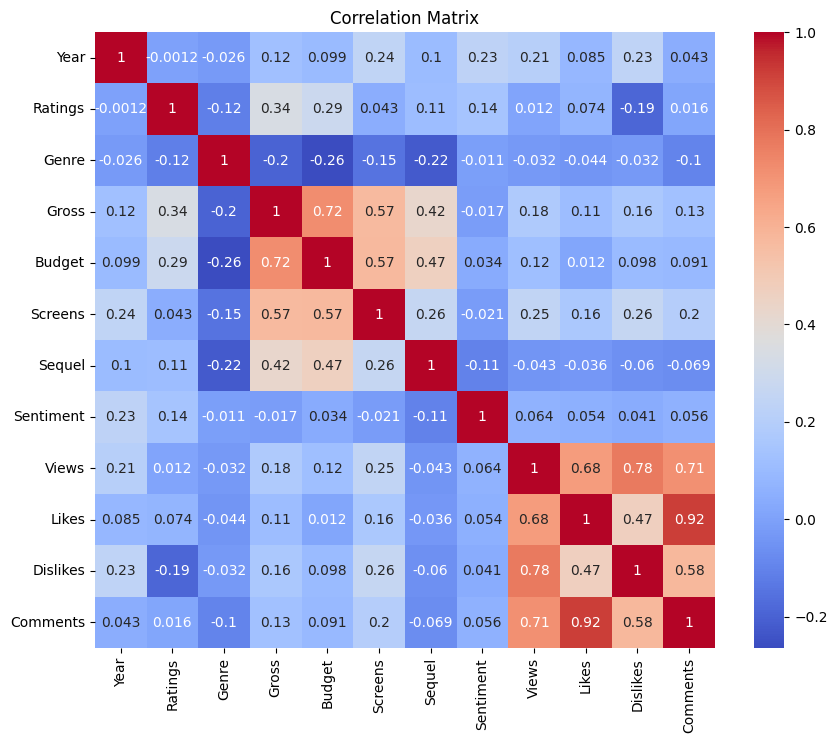

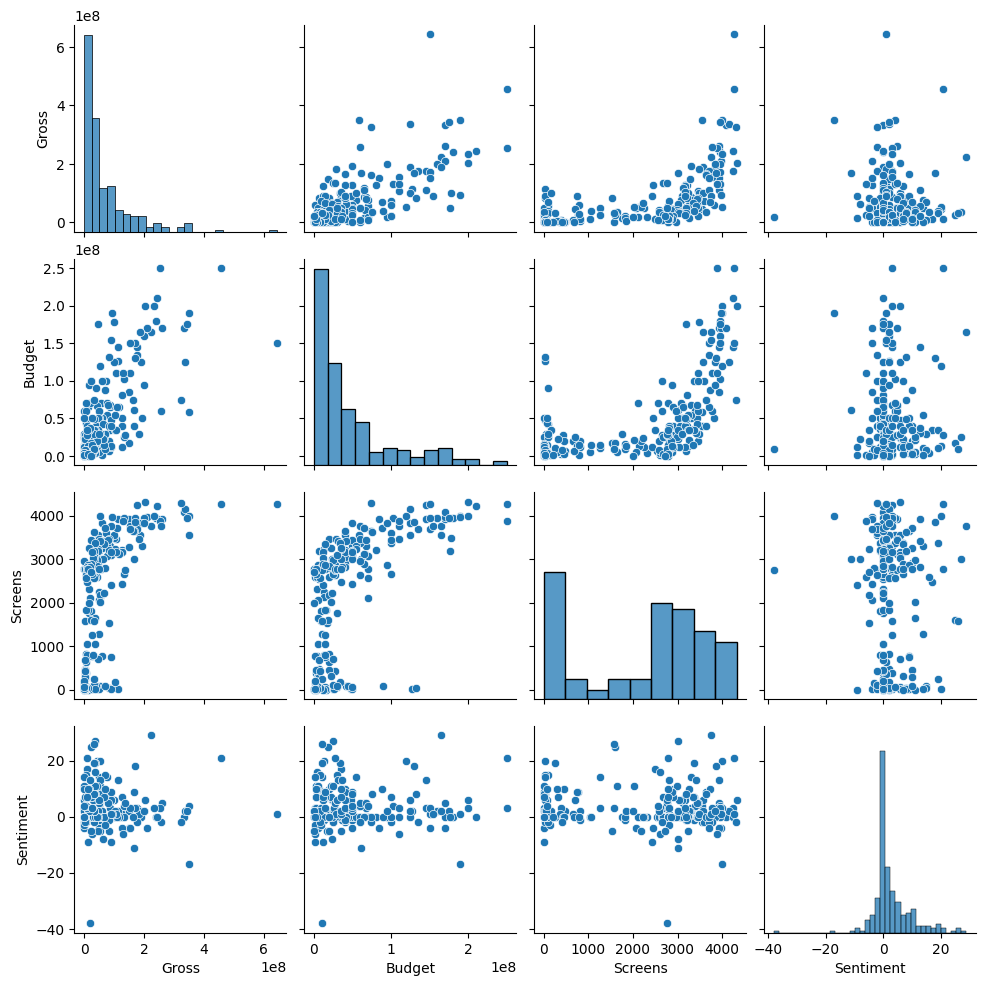

R-squared: 0.5824864050518704
Mean Absolute Error: $32183713.76834872 million


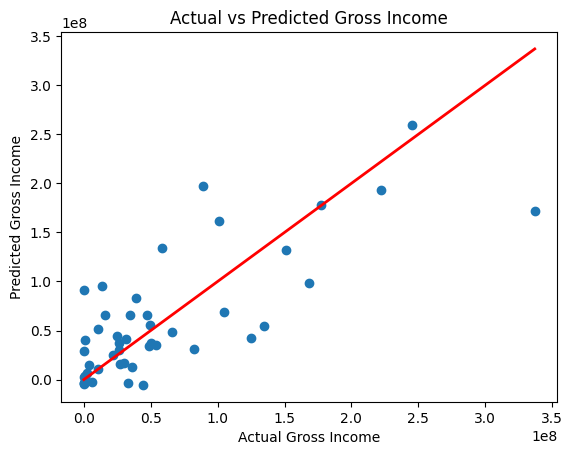

             Coefficient
Budget          1.003217
Screens     13540.361005
Sentiment -500400.540923
Budget and Screens have the strongest impact on predicting gross income, while Sentiment has a smaller effect.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'CSMdataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 1. Data Cleaning/Preparation
# Handling missing values
df['Budget'].fillna(df['Budget'].median(), inplace=True)
df['Screens'].fillna(df['Screens'].median(), inplace=True)
df.drop(columns=['Aggregate Followers'], inplace=True)

# 2. Exploratory Data Analysis (EDA)

# Basic statistics to understand the data
print(df.describe())

# Correlation matrix
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=np.number)  # Selects only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')  # Use numeric_df here
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to explore relationships
sns.pairplot(df[['Gross', 'Budget', 'Screens', 'Sentiment']])
plt.show()

# 3. Model Selection - Preparing data for regression
X = df[['Budget', 'Screens', 'Sentiment']]  # Predictors
y = df['Gross']  # Target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Building the Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# 5. Model Analysis - Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: ${mae} million")

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Gross Income')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.show()

# Display coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Conclusion
print("Budget and Screens have the strongest impact on predicting gross income, while Sentiment has a smaller effect.")